In [1]:
print 'Hello World!'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Tell iPython to include plots inline in the notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Hello World!


>>>Definition/Introduction/Motivation - Start<<<
User clickstream data and information about a group of hotels is given. The users are classified into a set of classes.
The classes are, Backpackers, Family, Couple. The objective is to predict the segment for a new customer using a
classifier. The task is to explore different classifiers and then select the best one for predictions. Cross-validation
is used to test the models by determining the F1 score.GraidCV and RandomCV are used to determine optimum
hyper parameters for the classifiers.
>>Data<<
Data is given in the form of two tables.
>train_search.csv:-<
This table contains details about the hotel bookings. 
>Hotel.csv:-<  
This table contains details about the hotel locations including a physical location and ratings
>>Objectives<<
1> Build a model than can predict the customer segment.
2> Analyze different classifiers and understand their accuracy and speed.
3> Implement CV based hyper-parameter optimization to tune the classifiers
>>Metrics<<
Cross-validation is used to validate the model for the test data against a model developed using the training data.
The test and training data are randomly obtained from the "train_search.csv". An F1 score is obtained based on the
predicted target and the acutal values for the target. This F1 score is the metrics for this project.
>>Tasks<<
The exercise is done  based on the following steps, 
<Step-1> Data mining and extraction:- This step involves reading the train_search.csv and hotel.csv and converting 
the data into a single table, globalTrain.csv. This process is executed using "join" using python pandas. 
However, here due to the size of data, I used mysql to generate the table. 
<Step-2> Identifying features and target in the test and training data. The features are extracted from the 
globalTrain and the target is the "Segment". This step involves the python pandas library and the following 
dataframes are created: X_train (features of trainigng data), y_train (target of training data), 
X_test (features of test dat i.e. evaluation.csv) and y_test (target of test data i.e. our final objective, 
the y_test is generated at the end). 
<Step-3> Performs cross-validation based F1 score tests and build the classifier models. Then fit the training 
data in the classifier. 
>>>Definition/Introduction/Motivation - End<<<

>>>Step - 1 - Start<<<
This step involved data extraction, mining and manipulations. Data is extracted and mined from the two inputted
csv files.
>>Data extraction and mining - Start<<
This step involves the extraction of data and appluing necessary joins to converts multiple dataframes into a single
dataframe.
The primary tables are,
>train_search.csv:-<
Number of rows:- 162848
Number of columns:- 12
1> Search ID:- An unique number ... 2> Booking Date :- Hotel booking date ... 3> HotelCode:- A code for hotel 
identification. This is a foreign key mapped to the primary key in Hotel.csv ..4> Age :- Age of the customer ..
5> Gender:- Gender of the customer .. 6> Number of Rooms :- Number of rooms booked in the hotel .. 7> Check in date :-
Check in date in the hotel .. 8> Check out date :- Check out date for the booking .. 9> Seen Price :- Price for the 
booking ..10> isClicked:- click identifier on the website .. 11> isBooked :- a boolean value to see if it was booked
online or not .. 12> Segment:- This is the classifier target.
>Hotel.csv:-<  
Number of rows:- 1000
Number of columns:- 12    
1> HotelCode:- An unique hote code identifier. This is the primary key in this table and used as a foreign key in
train_search.csv... 2> City :- City in which the hotel is located 3> Latitude :- Latitude of the location of the hotel
4> Longitude:- Longitude of the location of hotel 5> Star Rating:- Start rating of the hotel 6> TrioAdvisor Ration:- 
Trip advisor rating of the hotel

Read train_search.csv and store the data in a data frame named, "searchData"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Tell iPython to include plots inline in the notebook
%matplotlib inline
# Read dataset
searchData = pd.read_csv("train_search.csv")
#print "Dataset has {} rows, {} columns".format(*searchData.shape)
#print searchData.head() # print the first 5 rows
print "Successfull!!"

Successfull!!


Read Hotel.csv and store the data in a data frame named, "hotelData"

In [3]:
# Read dataset
hotelData = pd.read_csv("Hotel.csv")
#print "Dataset has {} rows, {} columns".format(*hotelData.shape)
#print hotelData.head() # print the first 5 rows
print "Successfull!!"

Successfull!!


Now join the two data frames based on "HotelCode" and develop a single data frame "globalData". in this process also create a csv file, "globalTrain.csv". Due to the size of searchData and computational limitations on my laptop I did not execute this join, rather used mysql to execute the join.
>>Data extraction and mining - End<<

In [ ]:
#globalData = searchData.join(hotelData, on='HotelCode')
#print "Dataset has {} rows, {} columns".format(*globalData.shape)
#print globalData.head() # print the first 5 rows


>>Data manipulation - Start<<
This step involves the following taskes,
1> Removal of "NA" and missing data
2> Convert strings to date time objects in the dataframes
3> Addition of new columns by performing arithematic operations on the existing columns
4> Convert discrete segments to discrete numbers understandable by the classifier. e.g. convert True/Falses to 1/0
In the current data set following actions are performed,
1> Replace True/False in "isClicked" column to 1/0
2> Replace True/False in "isBooked" column to 1/0
3> Replace 'backpacker'/'couple'/'family' in "Segment" to 1/3/2
4> Convert "Booking Date" from string to datetime object
5> Convert "Check in date" from string to datetime object
6> Convert "Check Out Date" from string to datetime object
7> Created a new column "Stay Period" - Difference in days between Check out date and Check in date
8> Created a new column "Travel Gap" - Difference in days between booking date and check in date

In [4]:
globalData = pd.read_csv("globalTrain.csv")
#print globalData.head() # print the first 5 rows
globalData=globalData.rename(columns = {' HotelCode':'HotelCode'})
globalData=globalData.rename(columns = {' Age':'Age'})
globalData=globalData.rename(columns = {' Gender':'Gender'})
globalData=globalData.rename(columns = {' Number of Rooms':'Number of Rooms'})
globalData=globalData.rename(columns = {' Check in date':'Check in date'})
globalData=globalData.rename(columns = {' Check Out Date':'Check Out Date'})
globalData=globalData.rename(columns = {' Seen Price':'Seen Price'})
globalData=globalData.rename(columns = {' isClicked':'isClicked'})
globalData=globalData.rename(columns = {' isBooked':'isBooked'})
globalData=globalData.rename(columns = {' Segment':'Segment'})
#print globalData.dtypes;
globalData['Booking Date'] =  pd.to_datetime(globalData['Booking Date'])
globalData['Check in date'] =  pd.to_datetime(globalData['Check in date'])
globalData['Check Out Date'] =  pd.to_datetime(globalData['Check Out Date'])
globalData['isClicked'] =  globalData['isClicked'].astype(str)
globalData['isBooked'] =  globalData['isBooked'].astype(str)

globalData['Stay Period'] = (globalData['Check Out Date'] - globalData['Check in date'])/np.timedelta64(1, 'D');
globalData['Travel Gap'] = (globalData['Check in date'] - globalData['Booking Date'])/np.timedelta64(1, 'D');
#print globalData.dtypes;
#print "Dataset has {} rows, {} columns".format(*globalData.shape)
#print globalData.head() # print the first 5 rows
print "Successfull!!"

Successfull!!


In [5]:
#Now separate training data - Target
y_train=globalData.iloc[:,[11]];
y_train['Segment'] = y_train['Segment'].replace(['backpacker', 'couple','family'], [1, 3, 2])
#print y_train.head();
#print y_train.dtypes;
print "Successfull!!"

Successfull!!


In [6]:
#Now separate training data
X_train=globalData.iloc[:,[3,4,5,8,9,10,16,17,18,19]];
#X_train=globalData.iloc[:,[3,5,8,16,18]];
#X_train=globalData.iloc[:,[3,4,8,16,18]];
#X_train=globalData.iloc[:,[3,4,18]];
#X_train=globalData.iloc[:,[3,4,5,8,9,16,17,18,19]];
X_train['Gender'] = X_train['Gender'].replace(['male', 'female'], [1, 0])
X_train['isClicked'] = X_train['isClicked'].replace(['True', 'False'], [1, 0])
X_train['isBooked'] = X_train['isBooked'].replace(['True', 'False'], [1, 0])
X_train[X_train < 0] = 0
#print X_train.head();
print X_train.dtypes;
#print X_train['Travel Gap'];
print "Successful!!"

Age                     int64
Gender                  int64
Number of Rooms         int64
Seen Price              int64
isClicked               int64
isBooked                int64
Star Rating             int64
TripAdvisor Rating    float64
Stay Period           float64
Travel Gap            float64
dtype: object
Successful!!


In [7]:
print X_train.describe()

                 Age         Gender  Number of Rooms    Seen Price  \
count  162848.000000  162848.000000    162848.000000  1.628480e+05   
mean       31.976512       0.508517         1.118626  2.887562e+04   
std        14.679818       0.499929         0.442624  1.685715e+06   
min        18.000000       0.000000         1.000000  0.000000e+00   
25%        22.000000       0.000000         1.000000  8.600000e+03   
50%        28.000000       1.000000         1.000000  1.240000e+04   
75%        37.000000       1.000000         1.000000  1.770000e+04   
max        80.000000       1.000000         8.000000  3.311511e+08   

           isClicked       isBooked    Star Rating  TripAdvisor Rating  \
count  162848.000000  162848.000000  162848.000000       162848.000000   
mean        0.598933       0.032736       3.810928            4.144279   
std         0.490116       0.177945       0.730745            0.498001   
min         0.000000       0.000000       1.000000            0.000000   

Now the X_train consists of the following 10 features,
1> Age (3), 
2> Gender (4), 
3> Number of rooms (5), 
4> Seen price (8), 
5> isCLicked (9), 
6> isBooked (10), 
7> Star Rating (16), 
8> Trip Adviser Rating (17), 
9> Stay period (Difference in days between Check out date and Check in date) (18), 
10 > Travel Gap  (Difference in days between booking date and check in date) (19).
Therefore, there are 10 features as mentioned above. Some of the features have a string/object value, convert those to discretes ones an zeros. 
*The number in braces is the column number in the "globalData" dataframe
>>Data manipulation - End<<
>>>Step - 1 - End<<<

In [7]:
#Now separate training data - Target
#y_train=globalData.iloc[:,[11]];
#y_train['Segment'] = y_train['Segment'].replace(['backpacker', 'couple','family'], [1, 3, 2])
#print y_train.head();
#print y_train.dtypes;
#print "Successfull!!"

>>>Step - 2 - Start<<<
>>Feature selection <<
This step is very significant in the development of the classifier model. In this step a detailed analysis is done to
determine the features those have a strong influence of the target. Intuitively it is logical that we need to build the
classifier based on influential features to prevent over fitting. Through this analysis an exploration of different
feature selection methods, such as KBest, Principal Component ANalysis (PCA) and Independent COmponent Analysis (ICA)
are implemented.
VarianceThreshold:-
This method selects all the features those have a variance greater than thr threshold. In the current implementation
we are removing the features those have a variance of less that 25% in data.

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
print sel.fit_transform(X_train)[0,:]
print X_train.head(n=1)

[  1.80000000e+01   7.10000000e+03   3.00000000e+00   1.00000000e+00
   0.00000000e+00]
   Age  Gender  Number of Rooms  Seen Price  isClicked  isBooked  Star Rating  \
0   18       0                1        7100          1         0            3   

   TripAdvisor Rating  Stay Period  Travel Gap  
0                 3.5          1.0         0.0  


In the output, only the features those pass the threshold test are printed in the function call "print sel.fit_transform(X_train)[0,:]". From the variance threshold feature selection we find out FIVE features have a strong variance the follwing features are selected, 1> Age, 2> Seen Price 3> Star rating 4> Stay Period, 5> Travel Gap.
Now let us build the features training data only with the five features in them

In [9]:
#Now separate training data
#X_train=globalData.iloc[:,[3,4,5,8,9,10,16,17,18,19]];
X_train=globalData.iloc[:,[3,8,16,18,19]];
#X_train['Gender'] = X_train['Gender'].replace(['male', 'female'], [1, 0])
#X_train['isClicked'] = X_train['isClicked'].replace(['True', 'False'], [1, 0])
#X_train['isBooked'] = X_train['isBooked'].replace(['True', 'False'], [1, 0])
X_train[X_train < 0] = 0
#print X_train.head();
print X_train.dtypes;
print "Successful!!"

Age              int64
Seen Price       int64
Star Rating      int64
Stay Period    float64
Travel Gap     float64
dtype: object
Successful!!


Now a correlation matrix is calcualted that determines the covarince between the parameters. It calculates the pearson's coefficient. The values range from -1 to 1. 

In [10]:
bigdata = pd.concat([X_train, y_train], axis=1)
print "Successfull!!"
print bigdata.corr()

Successfull!!
                  Age  Seen Price  Star Rating  Stay Period  Travel Gap  \
Age          1.000000   -0.006204    -0.013152     0.046623    0.035981   
Seen Price  -0.006204    1.000000     0.012070     0.008268   -0.002529   
Star Rating -0.013152    0.012070     1.000000     0.025758    0.015049   
Stay Period  0.046623    0.008268     0.025758     1.000000    0.294996   
Travel Gap   0.035981   -0.002529     0.015049     0.294996    1.000000   
Segment      0.075425   -0.002862     0.002235    -0.025639    0.018113   

              Segment  
Age          0.075425  
Seen Price  -0.002862  
Star Rating  0.002235  
Stay Period -0.025639  
Travel Gap   0.018113  
Segment      1.000000  


From the correlation matrix we observe the following, 1) Age is the most influential on the Segment as compared to other features. 2) Age is followed by "Stay Period" and "Travel Gap" in terms of covariances. 3) Star Rating is the least influential. Next we look at the principal components by performing a principal component analysis,

[[  5.40301043e-08  -1.00000000e+00  -5.23225422e-09  -9.57986790e-09
    8.20738300e-08]
 [ -1.04019883e-02  -8.25247335e-08  -2.01053042e-04  -1.05488136e-02
   -9.99890234e-01]
 [  9.99933750e-01   5.31264886e-08  -6.82001479e-04   4.77206197e-03
   -1.04526490e-02]
 [  4.87437946e-03   1.07588893e-08  -1.05208931e-02  -9.99877642e-01
    1.05000874e-02]
 [ -7.31188424e-04   5.09970414e-09  -9.99944401e-01   1.05190570e-02
    9.76948294e-05]]
[  9.99999999e-01   1.05329430e-09   7.57287359e-11   1.22388248e-12
   1.87696352e-13]


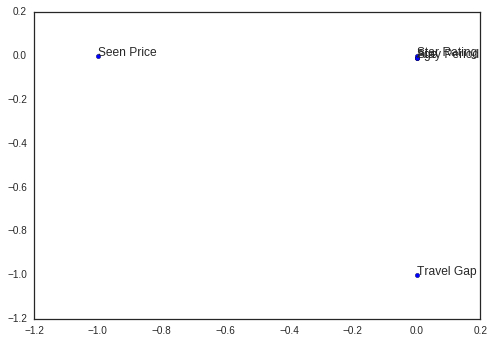

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.scatter(pca.components_[0],pca.components_[1])
ax.annotate('Age', (pca.components_[0][0],pca.components_[1][0]))
ax.annotate('Seen Price', (pca.components_[0][1],pca.components_[1][1]))
ax.annotate('Star Rating', (pca.components_[0][2],pca.components_[1][2]))
ax.annotate('Stay Period', (pca.components_[0][3],pca.components_[1][3]))
ax.annotate('Travel Gap', (pca.components_[0][4],pca.components_[1][4]))

From the principal components we observe that only one component (1st component) accounts for 99% of variance in data. From the plot it is visisble that Seen Price, Travel Gap and (Age, Start Rating, Stay Period) are far apart from each other. Therefore each of these components can be individually used for building the predictive model. Now let us look at the independent component by performing and independent component analysys (ICA).

[[ -8.32425274e-06  -1.36867712e-11  -2.19274693e-04   1.32039370e-03
   -8.99445372e-06]
 [  1.68740925e-04   8.82687523e-12  -4.26115941e-05   9.23210461e-06
   -2.56443059e-07]
 [  4.72867816e-06  -6.30755064e-12   9.34126252e-05   1.42665128e-04
   -4.65621094e-05]
 [ -3.46457503e-08  -1.47005666e-09   7.80534108e-06  -8.66909533e-07
    3.49387021e-08]
 [ -3.90965707e-06   1.46184409e-11  -3.38429291e-03  -5.14362096e-05
   -3.09333401e-07]]


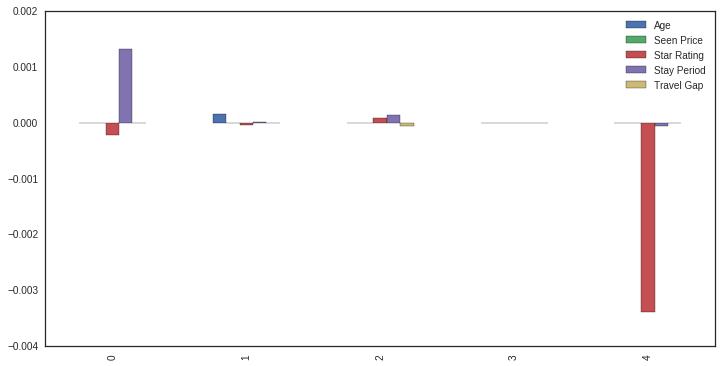

In [22]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=5, random_state=1)
ica.fit(X_train)
# Print the independent components
print ica.components_
pd.DataFrame(ica.components_, columns=X_train.columns).plot(kind = 'bar', figsize = (12, 6))

ICA converts a multivariate dataset to additive individual components. The resulting matrix
above is the ICA components. Each vector corresponds to a component, and it defines the independence
with respect to other features. These components help in projecting the data from ICA axis to the original
axis. The row feature can be reconstructed by a linear combination of the columns in that specific row. AT this point based on PCA and ICA, the features selected are, "Age", "Star ating" and "Travel Gap". Let us update our training data to contain only these three features,

In [11]:
X_train=globalData.iloc[:,[3,16,19]];
X_train[X_train < 0] = 0
#print X_train.head();
print X_train.dtypes;
print "Successful!!"

Age              int64
Star Rating      int64
Travel Gap     float64
dtype: object
Successful!!


>>Feature selection - End <<
>>>Step - 2 - End<<<

>>> Step -3 - Start <<<
>> Build testing model <<
The best way to test a classifier model is cross-validation. In cross-validation an input set is brocken into training and testing set. The testting set is used to test the model built using the training set. And then the F1 score is computed. The next block of code is used to split the input data randomly into traing set and testing set. After the block is executed a set of training and test features and target are available for cross validation. The variables generated are X_train_cv, y_train_cv, X_test_cv and y_test_cv.

In [12]:
from sklearn.cross_validation import train_test_split
# First, decide how many training vs test samples you want
num_test = 40000
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=num_test)
print "Training set: {} samples".format(X_train_cv.shape[0])
print "Test set: {} samples".format(X_test_cv.shape[0])

Training set: 122848 samples
Test set: 40000 samples


The next block of code is a method that fits a training data into an inputted classifier and also returns and prints the time it takes to train the model. Create a method, "train_classifier" that trains an input classifier with inputted training data. The mthods prints the training time and also returns the time to the caller.

In [13]:
import time as time
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def train_classifier(clf, X_train, y_train):
    #print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    #print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    return (end - start)


Now try different classifiers and track the time and the accuracy. In the following code snippet, several different types of classifiers are instantiated and each of their's prediction accurace is determined useing a brute force method.

A decision tree classifier is initiated and a classifier model is built and fittedwith the cross-validation training features and target.

In [15]:
# Fit model to training data
#Best classifier
import time as time
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, grid_search, naive_bayes
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier

#clf = DecisionTreeClassifier(random_state=0)
#clf = DecisionTreeClassifier(min_samples_split= 2, max_leaf_nodes= 32, criterion= 'entropy',
#                             max_depth = 9, min_samples_leaf=179)
#clf = DecisionTreeClassifier(min_samples_split= 21, max_leaf_nodes= 20, criterion= 'gini',
#                             max_depth = None, min_samples_leaf=11)

#dtr_params = {'criterion':("gini","entropy")}
#dtc2 = DecisionTreeClassifier(random_state=0)
#clf = linear_model.LogisticRegression()
#clf = grid_search.GridSearchCV(dtc2, dtr_params)

#dtr_params = {'criterion':("gini","entropy"),'presort':("True","False"),
#              'min_weight_fraction_leaf':(0,0.25,0.5), 'min_samples_leaf':(1,2,3),
#              'min_samples_split':(2,4,8,16,32),'min_samples_split':(2,4,8,16), 
#              'max_features':("auto","sqrt","log2"),'max_depth':np.arange(1,5,1)}
#dtc2 = DecisionTreeClassifier(random_state=0)
#clf = grid_search.GridSearchCV(dtc2, dtr_params)   

#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier()
#clf1 = RandomForestClassifier(n_estimators=20)
# use a full grid over all parameters
#param_grid = {#"max_depth": [3, None],
              #"max_features": [1, 3, 10],
              #"min_samples_split": [1, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [True, False],
              # "criterion": ["gini", "entropy"]
              #  "n_estimators": [5, 20,30]}
#clf = GridSearchCV(clf1, param_grid=param_grid)

#parameters={'C' : [.005,.05,.5,1.,10.,100.,],
#'fit_intercept' : [True, False],
#'class_weight': [ None,'balanced'],
#'random_state' : [None,42],
#'penalty': ['l1', 'l2']
#}
#clf = svm.SVC()

#SVC does not work
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 20]}
#svr = svm.SVC()
#clf = SVC(kernel="linear", C=1.0)

#Bad results
#clf= GaussianNB()

#clf=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()


#from sklearn.linear_model import SGDRegressor
#clf = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
#             fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
#             loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
#             random_state=None, shuffle=True, verbose=0, warm_start=False)

#from sklearn.naive_bayes import BernoulliNB
#clf = BernoulliNB()

#from sklearn.linear_model import PassiveAggressiveClassifier
clf=PassiveAggressiveClassifier()

#Works
#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(n_neighbors=35)

#Works
#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(criterion='entropy',n_estimators=100, max_features=None,random_state=None)
#clf = RandomForestClassifier(n_estimators=20,min_samples_split=4)


#Works
#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100)
#clf = RandomForestClassifier(n_estimators=100,max_features=None)

#Works
#from  sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(n_estimators=50)
#clf = AdaBoostClassifier(n_estimators=60,learning_rate=0.65)

#from sklearn.tree import DecisionTreeClassifier
#clf2 = DecisionTreeClassifier(min_samples_split= 2, max_leaf_nodes= 20, criterion= 'gini',
#                             max_depth = None, min_samples_leaf=1)
#clf = AdaBoostClassifier(base_estimator=clf2,n_estimators=1,learning_rate=18,algorithm='SAMME')


#clf1 = AdaBoostClassifier()
#param_grid = { "n_estimators": [5, 20,30]}
#lf = GridSearchCV(clf1, param_grid=param_grid)

#from  sklearn.ensemble import RandomForestClassifier
#clf1 = RandomForestClassifier(n_estimators=20)
#clf = AdaBoostClassifier(base_estimator=clf1,n_estimators=50)

#Works
#from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', tol=0.0001)

#Works
#from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariances=False, tol=0.000000001)

train_classifier(clf, X_train_cv, y_train_cv) # note: using entire training set here
#print clf # you can inspect the learned model by printing it

print "Successfull!!"

Successfull!!


/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#Predict on training set and compute F1 score
from sklearn.metrics import f1_score
def predict_labels(clf, features, target):
    #print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    #print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    #return f1_score(target.values, y_pred, pos_label='yes')
    return f1_score(target.values, y_pred) , (end - start)


In [16]:
#print y_train.head()
#print X_train.head()
train_cv_f1_score = predict_labels(clf, X_train_cv, y_train_cv)
#print "F1 score for training set: {}".format(train_cv_f1_score)
# Predict on test data
test_cv_f1_score = predict_labels(clf, X_test_cv, y_test_cv)
#print "F1 score for test set: {}".format(test_cv_f1_score)

/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/akansha/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

In [53]:
#Report
from astropy.table import Table, Column
import time as time
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, grid_search, naive_bayes
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [25]:
noOfTypes =10;
t1 = Table(names=('Type','Training time' ,'Prediction time-Training', 'F1 score-Training', 
                  'Prediction time-Testing', 'F1 score-Testing'), dtype=('S25', 'f4','f4', 'f4','f4', 'f4'))

for i in range(0,noOfTypes):
    if i==0:
        clf=PassiveAggressiveClassifier();
    if i==1:
        clf=GaussianNB(); 
    if i==2:    
        clf = DecisionTreeClassifier(random_state=0)
    if i==3:    
        clf = RandomForestClassifier()
    if i==4:    
        clf = BernoulliNB()
    if i==5:    
        clf = LogisticRegression()
    if i==6:    
        clf = KNeighborsClassifier()
    if i==7:    
        clf = AdaBoostClassifier()
    if i==8:    
        clf = LinearDiscriminantAnalysis()
    if i==9:    
        clf = QuadraticDiscriminantAnalysis()
        
    clfType=clf.__class__.__name__;
    trainTime=train_classifier(clf, X_train_cv, y_train_cv);
    retVec=predict_labels(clf, X_train_cv, y_train_cv)
    trainF1Score=retVec[0];
    trainTime=retVec[1];
    retVec1=predict_labels(clf, X_test_cv, y_test_cv)
    testF1Score=retVec1[0];
    testTime=retVec1[1];
    t1.add_row((clfType,trainTime,trainTime, trainF1Score,testTime, testF1Score))

#t1 = Table(names=('Type','Training time' ,'Prediction time-Training', 'F1 score-Training', 'Prediction time-Testing', 'F1 score-Testing'), dtype=('S13', 'f4','f4', 'f4','f4', 'f4'))
#t1.add_row(('SVC',1,100, 3,4, 5))
#t1.add_row(('SVC',2, 200, 33,44, 55))

t1    

Type,Training time,Prediction time-Training,F1 score-Training,Prediction time-Testing,F1 score-Testing
str25,float32,float32,float32,float32,float32
PassiveAggressiveClassifi,0.00794792,0.00794792,0.26596,0.00275993,0.26858
GaussianNB,0.0181749,0.0181749,0.587897,0.00532699,0.589002
DecisionTreeClassifier,0.0221438,0.0221438,0.986583,0.007617,0.977333
RandomForestClassifier,0.290855,0.290855,0.983003,0.095232,0.952203
BernoulliNB,0.015748,0.015748,0.323137,0.00455809,0.321842
LogisticRegression,0.00847602,0.00847602,0.479718,0.00287604,0.477646
KNeighborsClassifier,0.880349,0.880349,0.940098,0.286511,0.909916
AdaBoostClassifier,1.43477,1.43477,0.601057,0.459271,0.598315
LinearDiscriminantAnalysi,0.00837684,0.00837684,0.47976,0.00288296,0.477299


The above table presents the performance analysis of a set of 10 different classifiers. The table presents the training time, prediction time of training data, f1 score of training data, prediction time of test data and f1 score os test data. Let us select the BEST THREE classifiers for further analysis. The next step is to use grid and random CV to determine optimizaed hyper parameters. The classifiers chosen at this point are,
1> Decision Tree Classifier
2> Random Forst Classifier
3> KNeighbors Classifiers

For the search of hyper parameters, the idea is to perform grid based search and random search for all the three classifier types and the analysis is plotted. First, few methods are implemeted,
run_gridsearch :- This functions takes the data, parameters, number of folds and the classifier as input. It runs different several parameter options based on a grid and returns the best parameter set.
run_randomsearch :- This functions takes the data, parameters, number of folds and the classifier as input. It runs different several parameter options randomly and returns the best parameter set.
report :- Reports the top three scores.

In [36]:
from time import time
def run_gridsearch(X, y, clf, param_grid, cv=5):
    """""
    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn classifier
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv, verbose=5)
    start = time()
    grid_search.fit(X, y)

    #print(("\nGridSearchCV took {:.2f} "
    #       "seconds for {:d} candidate "
    #       "parameter settings.").format(time() - start,
    #            len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 1)
    return  top_params

In [42]:
from time import time
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=20):
    """

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn classifier
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, verbose=5)

    start = time()
    random_search.fit(X, y)
    #print(("\nRandomizedSearchCV took {:.2f} seconds "
    #       "for {:d} candidates parameter "
    #       "settings.").format((time() - start),
    #                          n_iter_search))

    top_params = report(random_search.grid_scores_, 1)
    return  top_params



In [34]:
from time import time
from operator import itemgetter
from scipy.stats import randint
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters



In [49]:
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn import svm, grid_search, naive_bayes
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model
#print("-- Grid Parameter Search via 10-fold CV")

#Decision Tree Classifier 
#parameter distribution for Grid CV
#param_dist = {"criterion": ["gini", "entropy"],
#              "min_samples_split": [2,10,20],
#              "max_depth": [None, 2, 5, 10],
#              "min_samples_leaf": [1,5,10],
#              "max_leaf_nodes": [None, 5, 10, 20],
#              }
#dt = DecisionTreeClassifier()

#parameter distribution for random CV
#param_dist = {"criterion": ["gini", "entropy"],
#              "min_samples_split": sp_randint(1, 100),
#              "max_depth": sp_randint(1, 20),
#              "min_samples_leaf": sp_randint(1, 200),
#              "max_leaf_nodes": sp_randint(2, 100),              
#              }
#dt = DecisionTreeClassifier()



#RandomForestClassifier
# build a classifier
# Random parameters
#param_dist = {"max_depth": [3, None],
#              "max_features": sp_randint(1, 4),
#              "min_samples_split": sp_randint(1, 11),
#              "min_samples_leaf": sp_randint(1, 11),
#              "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]}
#dt = RandomForestClassifier()

# Grid parameters
#param_dist = {"max_depth": [3, None],
#              "max_features": [1,2,4],
#              "min_samples_split": [2,5,11],
#              "min_samples_leaf":  [2,5,11],
#              "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]}
#dt = RandomForestClassifier()


#KNearest Neighbors
#GridCV parameters
#param_dist = {"n_neighbors": [1,5,20,100],
#              "leaf_size": [5,20,100],
#              "p": [1,2,10],
#              "algorithm": ["auto", "ball_tree","kd_tree","brute"],
#              "weights": ["uniform", "distance"]}
#dt = KNeighborsClassifier()

#RandomCV parameters
#param_dist = {"n_neighbors": sp_randint(2, 100),
#              "leaf_size": sp_randint(2, 100),
#              "p": sp_randint(2, 10),
#              "algorithm": ["auto", "ball_tree","kd_tree"],
#              "weights": ["uniform", "distance"]}
#dt = KNeighborsClassifier()


features = ["Age","Star Rating","Travel Gap"]

y_arr = y_train["Segment"]
X_arr = X_train[features]
#Call grid based CV search
#ts_gs = run_gridsearch(X_arr, y_arr, dt, param_dist, cv=10)
#Call random CV based search
#ts_rs = run_randomsearch(X_arr, y_arr, dt, param_dist, cv=10,n_iter_search=500)

Results fo CV based hyper-parameter search:-

DecisionTreeClassifier - RandomCV :-
Model with rank: 1
Mean validation score: 0.589 (std: 0.005)
Parameters: {'min_samples_split': 95, 'max_leaf_nodes': 54, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 42}
DecisionTreeClassifier - GridCV :-
Model with rank: 1
Mean validation score: 0.609003 (std: 0.005)
Parameters: {'min_samples_split': 10, 'max_leaf_nodes': 10, 'criterion': 'gini', 'max_depth': 'None', 'min_samples_leaf': 5}

RandomForest - RandomCV :-
Model with rank: 1
Mean validation score: 0.589 (std: 0.003)
Parameters: {'bootstrap': True, 'min_samples_leaf': 9, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 3, 'max_depth': 3}
RandomForest - GridCV :-
Model with rank: 1
Mean validation score: 0.590211 (std: 0.004)
Parameters: {'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 5, 'criterion': 'gini', 'max_features': 1, 'max_depth': 3}

KNearestNeighbors - RandomCV :-
Model with rank: 1
Mean validation score: 0.549 (std: 0.004)
Parameters: {'n_neighbors': 86, 'weights': 'uniform', 'leaf_size': 93, 'algorithm': 'kd_tree', 'p': 5}
KNearestNeighbors - GridCV :-
Model with rank: 1
Mean validation score: 0.542189 (std: 0.004)
Parameters: {'n_neighbors': 1, 'weights': 'uniform', 'leaf_size': 5, 'algorithm': 'kd_tree', 'p': 10}



From the results the DecisionTreeClassifier with the following parameters is the best. 
('min_samples_split': 10, 'max_leaf_nodes': 10, 'criterion': 'gini', 'max_depth': 'None', 'min_samples_leaf': 5)